#  <ins>Verkehrsuntersuchung - Machine Learning</ins>

## Initialisierung

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('hour.csv')
df['instant'] = df['instant'] -1
df = df.rename(columns = {'yr':'year', 'mnth':'month', 'cnt':'total', 'hr':'hour'})
df['year'] = df['year'] + 2011
df = df.set_index('instant')
#day_names = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
#df['weekday'] = (df['weekday'] -1).astype('int').apply(lambda n: day_names[n])
df.head()

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
instant,,,,,,,,,,,,,,,,
0,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Dataframe für Machine learning erstellen
categorical_features = df[['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weathersit']]
numerical_features = df[['temp', 'atemp', 'hum', 'windspeed']]
labels = df[['casual', 'registered', 'total']]

In [4]:
# Aureißer ausschließen
if False:
    problem_tage = [
    '2018-04-25',
    '2019-07-28',
    '2019-10-20',
    '2021-12-13',
    '2023-01-30',
    '2023-05-15',
    ]
    problem_tage = pd.to_datetime(problem_tage)
    filt = df.index.normalize().isin(problem_tage)
    df = df[~filt]

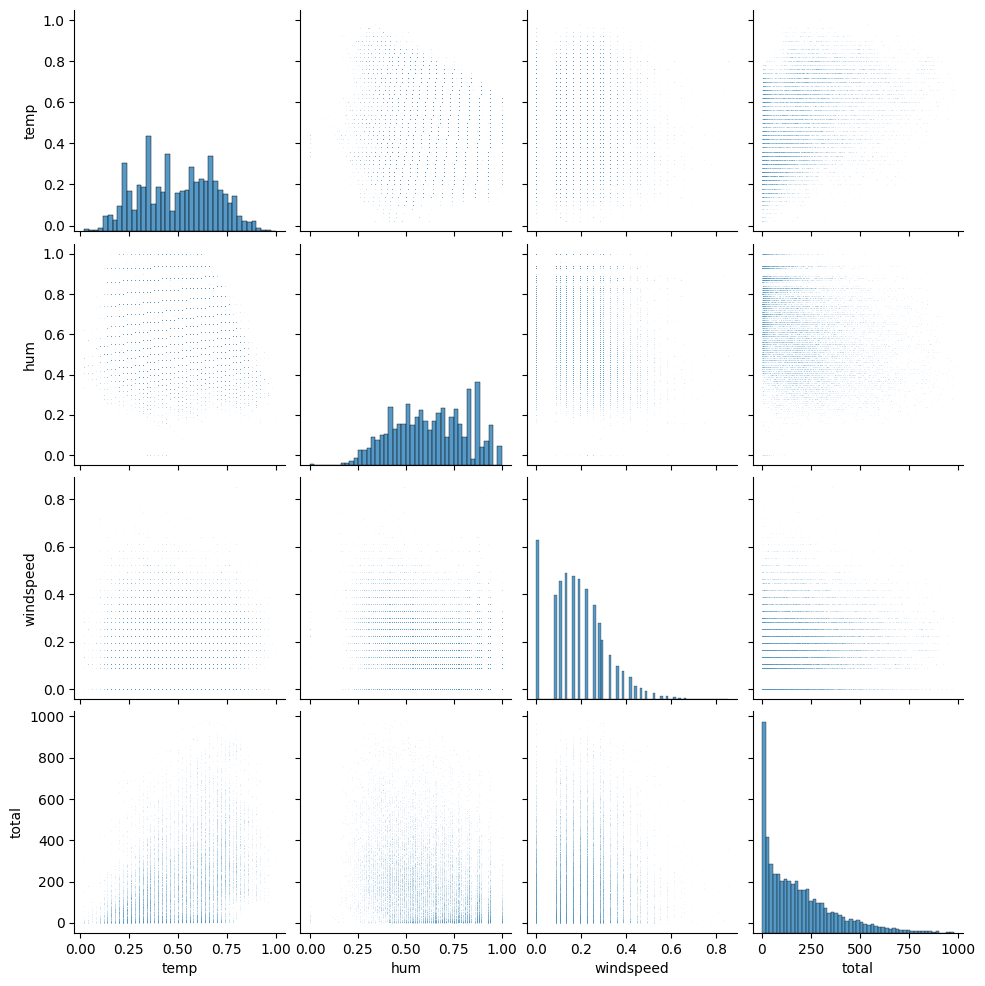

In [5]:
df_view = df[['temp', 'hum', 'windspeed', 'total']]
sns.pairplot(df_view, plot_kws={"s": 0.05})

## Machine Learning - Vorhersage der Nutzungszahlen

In [7]:
df_ml = df[['season', 'hour', 'workingday', 'weekday', 'temp', 'hum', 'windspeed', 'registered']]
df_ml = pd.concat( [ df_ml.drop('weekday', axis = 1), pd.get_dummies(df_ml['weekday'], prefix = 'weekday', dtype = int) ], axis = 1)
df_ml = pd.concat( [ df_ml.drop('workingday', axis = 1), pd.get_dummies(df_ml['workingday'], prefix = 'orkingday', dtype = int) ], axis = 1)
df_ml = pd.concat( [ df_ml.drop('season', axis = 1), pd.get_dummies(df_ml['season'], prefix = 'season', dtype = int) ], axis = 1)
df_ml = pd.concat( [ df_ml.drop('hour', axis = 1), pd.get_dummies(df_ml['hour'], prefix = 'hour', dtype = int) ], axis = 1)

In [9]:
if False:
    param_grid = {
        'C': [0.1, 1, 10, 100],        # Regularisierungsparameter
        'epsilon': [0, 1, 5],   # Toleranz für den Fehler
    }
    
    model = SVR()
    
    # GridSearchCV initialisieren
    grid_search = GridSearchCV(model, param_grid)
    
    X = df_ml.drop(columns = ['registered'])
    y = df_ml['registered']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0, 1, 5]})

In [15]:
model = SVR(C = 100, epsilon = 5)
X = df_ml.drop(columns = ['registered'])
y = df_ml['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
model.fit(X_train,y_train)

SVR(C=100, epsilon=5)

In [16]:
y_pred = model.predict(X_test)

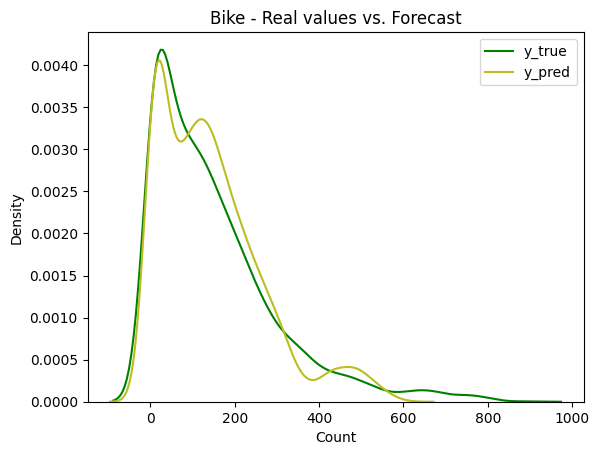

In [17]:
sns.kdeplot(y_test, color='green', label='y_true')
sns.kdeplot(y_pred, color=sns.color_palette()[8], label='y_pred')
# Titel und Achsenbeschriftungen
plt.title("Bike - Real values vs. Forecast")
plt.xlabel("Count")
plt.ylabel("Density")
plt.legend()
plt.show()

In [18]:
y_diff = y_test - y_pred

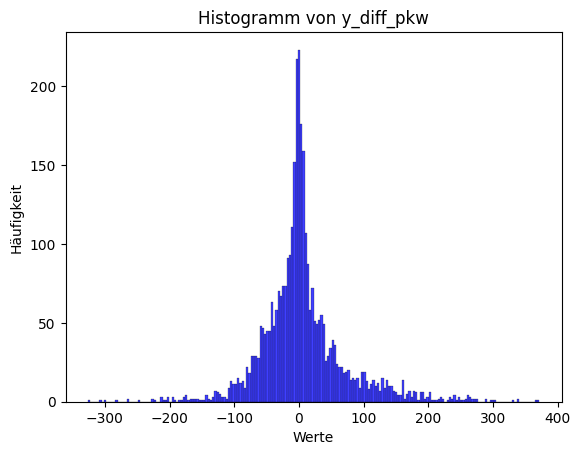

In [19]:
sns.histplot(y_diff, bins=200, kde=False, color='blue')
plt.title("Histogramm von y_diff_pkw")
plt.xlabel("Werte")
plt.ylabel("Häufigkeit")
plt.show()

In [21]:
print(y_diff.mean())
print(y_diff.std())

6.223699589066603
66.71271676293856


## Machine Learning - Identifikation von Annomalien